# Task 2: Predictive Modeling of Customer Bookings

## Exploratory Data Analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

In [8]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


## Handling Categorical Variables

In [9]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [10]:
df["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [11]:
df = pd.get_dummies(df, columns=["sales_channel", "trip_type"])

In [12]:
len(df["route"].unique())

799

In [13]:
len(df["booking_origin"].unique())

104

In [14]:
route_freq = df['booking_origin'].value_counts(normalize=True)
df['booking_origin'] = df['booking_origin'].map(route_freq)

route_freq = df['route'].value_counts(normalize=True)
df['route'] = df['route'].map(route_freq)

## Model Training

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight

### Decision Tree Classifier Model

In [16]:
# Arranging data into features and target
features = [
    'num_passengers',
    'purchase_lead',
    'length_of_stay',
    'flight_hour',
    'flight_day',
    'wants_extra_baggage',
    'wants_preferred_seat',
    'wants_in_flight_meals',
    'flight_duration',
    'sales_channel_Internet',
    'sales_channel_Mobile',
    'trip_type_CircleTrip',
    'trip_type_OneWay',
    'trip_type_RoundTrip',
    'booking_origin',
    'route'
]
X = df.loc[:, features]
y = df['booking_complete']

In [17]:
# Splitting data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.75)

In [18]:
# Initializing Decision Tree Classifier model
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=1)

In [19]:
# Training model on data
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [20]:
feature_importance_dt = dt_clf.feature_importances_

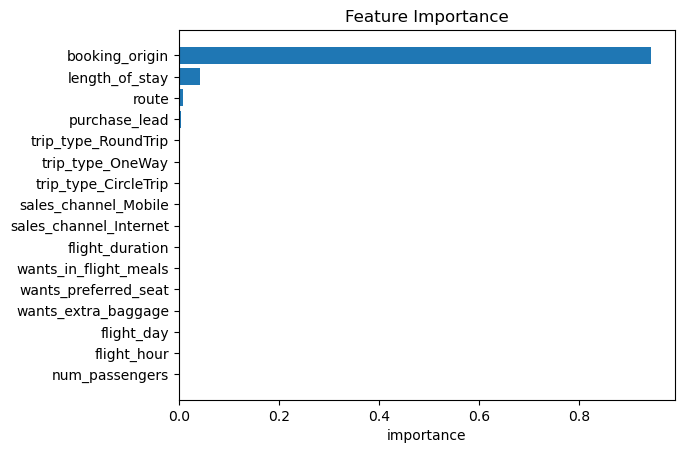

In [21]:
# Visualizing feature importances
feature_importance_dt_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance_dt})
feature_importance_dt_df = feature_importance_dt_df.sort_values(by='importance')

plt.barh(feature_importance_dt_df['feature'], feature_importance_dt_df['importance'])
plt.xlabel('importance')
plt.title('Feature Importance')
plt.show()

In [22]:
# Making predictions on the test set
y_pred_dt = dt_clf.predict(X_test)

#### Evaluating Decision Tree Classifier Model

In [23]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix_dt)

Confusion Matrix:
 [[10606     2]
 [ 1892     0]]


In [24]:
class_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", class_report_dt)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     10608
           1       0.00      0.00      0.00      1892

    accuracy                           0.85     12500
   macro avg       0.42      0.50      0.46     12500
weighted avg       0.72      0.85      0.78     12500



- The precision for class 1 is 0, indicating that the model predicted no true positive instances correctly. This is reflected in the f1-score and recall  which are all 0. 
- The model seems to perform well for class 0, with a high precision, recall, and F1-score.

### Random Forest Classifier Model

In [25]:
# Initializing Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')

In [26]:
# Training the model on the data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

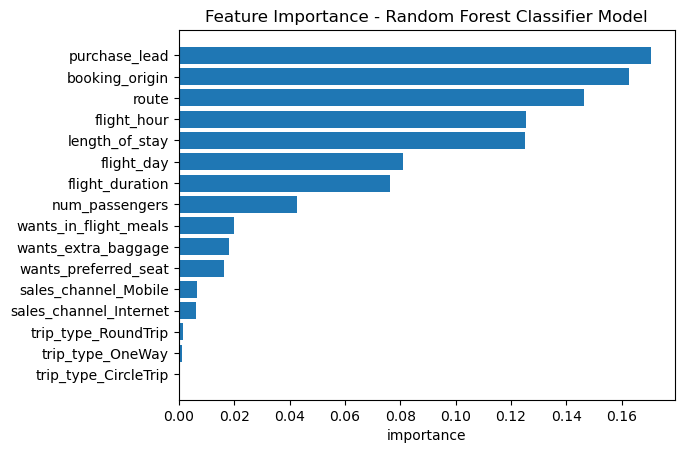

In [31]:
# Visualizing feature importances
feature_importance_rf = rf_clf.feature_importances_
feature_importance_rf_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance_rf})
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='importance')

plt.barh(feature_importance_rf_df['feature'], feature_importance_rf_df['importance'])
plt.xlabel('importance')
plt.title('Feature Importance - Random Forest Classifier Model')
plt.show()

In [28]:
# Making predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

#### Evaluating Random Forest Classifier Model

In [29]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

Confusion Matrix:
 [[10442   166]
 [ 1701   191]]


In [30]:
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", class_report_rf)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     10608
           1       0.54      0.10      0.17      1892

    accuracy                           0.85     12500
   macro avg       0.70      0.54      0.54     12500
weighted avg       0.81      0.85      0.80     12500



- This model performs better for class 1 compared to the Decision Tree Classifier, a non-zero precision, recall, and f1-score for class 1.
- The precision for class 1 is 0.54, suggesting that, among the instances predicted as positive, 54% were actually positive and it's recall is 0.10, indicating that the model only identified 10% of the actual positive instances.
- Just like the decision tree classifier, this model also performs well for class 0, with a high precision, recall, and F1-score.

### Comparing Models

- It appears that both models, have similar overall accuracy (around 85%), but the Random Forest Classifier performs better for positive instances (class 1) compared to the Decision Tree Classifier.
- The Decision Tree Classifier struggles to correctly predict positive instances, as evident from precision, recall, and F1-score values of 0 for class 1, while the Random Forest Classifier provides a more balanced performance